https://archive.ics.uci.edu/ml/machine-learning-databases/00294/

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_excel('powergen.xlsx')
df.columns = ['ambientTemp', 'exhaustVacuum', 'pressure', 'relativeHumidity', 'powerOutput']

In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ambientTemp       9568 non-null   float64
 1   exhaustVacuum     9568 non-null   float64
 2   pressure          9568 non-null   float64
 3   relativeHumidity  9568 non-null   float64
 4   powerOutput       9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,ambientTemp,exhaustVacuum,pressure,relativeHumidity,powerOutput
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


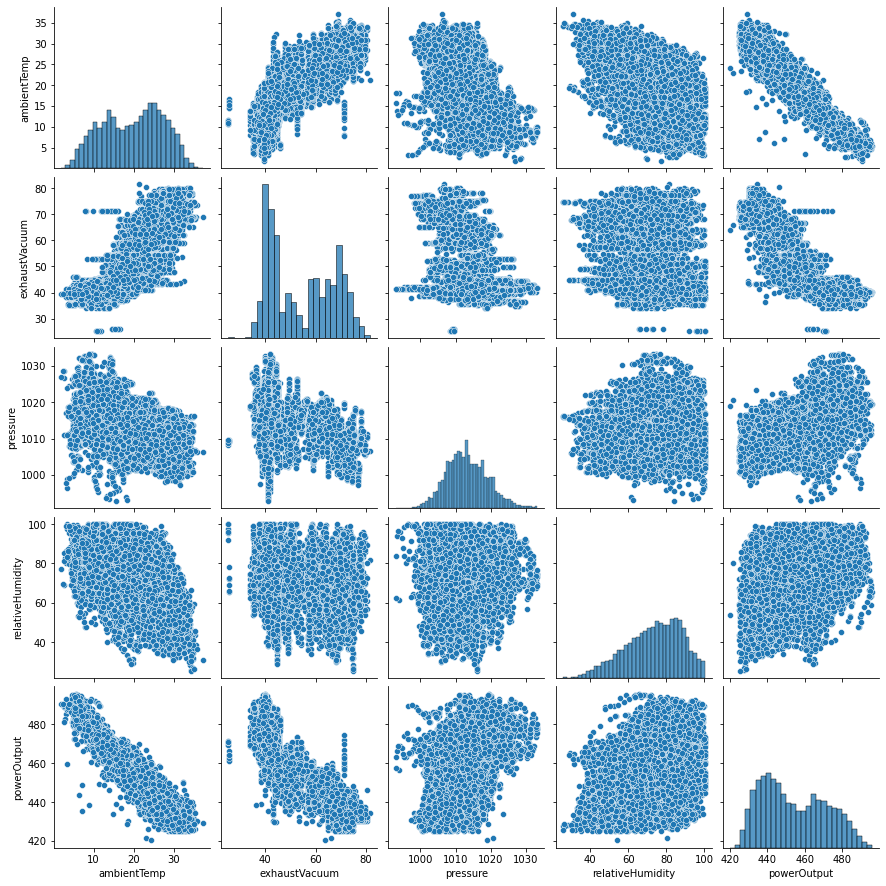

In [27]:
sns.pairplot(df)

<AxesSubplot:>

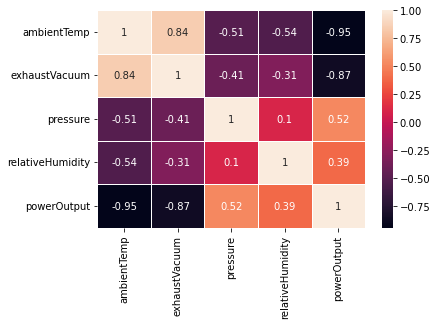

In [28]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

In [29]:
x = df[['ambientTemp', 'exhaustVacuum', 'pressure']]
y = df['powerOutput']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [31]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [32]:
print("Intercept : ",lm.intercept_)

#To retrieve the slope (m):
print(lm.coef_)

Intercept :  348.61029574766326
[-1.63400157 -0.33416559  0.15396822]


In [33]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted values')

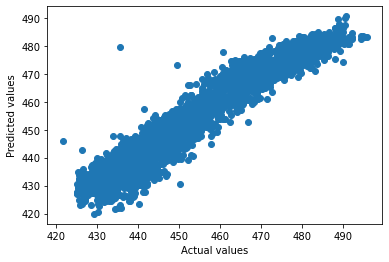

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [35]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.9188711022857902
R2 score :  0.9188709021217953
MSE:  23.634211612975385
